In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

In [2]:
df.head(2)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742


In [3]:
df.info

<bound method DataFrame.info of          상가업소번호           상호명   지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0      19956873        하나산부인과   NaN         S       의료       S01        병원   
1      20024149      타워광명내과의원   NaN         S       의료       S01        병원   
2      20152277     조정현신경외과의원   NaN         S       의료       S01        병원   
3      20350610      한귀원정신과의원   NaN         S       의료       S01        병원   
4      20364049     더블유스토어수지점   수지점         S       의료       S02    약국/한약방   
...         ...           ...   ...       ...      ...       ...       ...   
91330  16196725         온누리약국   베스트         S       의료       S02    약국/한약방   
91331  16192180            리원  봄산후조         S       의료       S07  의료관련서비스업   
91332  16127538       참좋은요양병원   NaN         S       의료       S01        병원   
91333  16108681       경희중앙한의원   NaN         S       의료       S01        병원   
91334  16109073  천안김안과천안역본점의원   NaN         S       의료       S01        병원   

      상권업종소분류코드 상권업종소분류명 표준산업분류

Mission 1
전국 시도별 약국수를 구해주세요!
상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요. 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다.
각자 구하기 편한 방법을 통해 빈도수를 구합니다.
다음의 결과가 나오도록 구합니다.
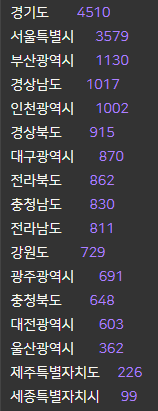

In [7]:
# '약국'만 필터링하고 시도별로 그룹화하여 개수를 세는 코드입니다.

# 1. '상권업종소분류명' 열에서 '약국'인 행만 선택하고,
# 2. '시도명' 열이 null이 아닌 (즉, 값이 있는) 행들만 선택한 후,
# 3. '시도명'을 기준으로 그룹화하여,
# 4. 각 그룹의 개수를 세고,
# 5. 개수를 내림차순으로 정렬합니다.
pharmacy_count = df[(df['상권업종소분류명'] == '약국') &  # '상권업종소분류명'이 '약국'인 행을 필터링
                    (df['시도명'].notnull()) # '시도명'이 null이 아닌 행을 필터링
                    ].groupby('시도명').size().sort_values(ascending=False)
 # '시도명'을 기준으로 그룹화하고 각 그룹의 크기를 계산
 # 개수를 내림차순으로 정렬

# 결과 출력
print(pharmacy_count)

시도명
경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
dtype: int64


Mission2. 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?

빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요!
다음의 결과가 나오도록 구합니다.



🔽 출력 예시

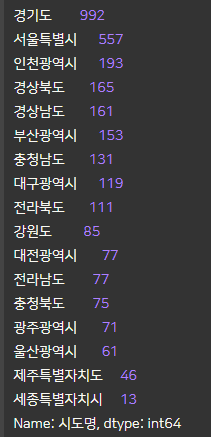

In [20]:
# 병원, 약국, 동물병원을 포함한 데이터만 필터링
filtered_df = df[df['상권업종소분류명'].str.contains('동물병원')]

# 시도별로 동물병원의 수 계산
count_by_province = filtered_df.groupby('시도명').size().sort_values(ascending=False)

# 결과 출력
print(count_by_province)

시도명
경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
전라남도        77
대전광역시       77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
dtype: int64


In [23]:
# 서울특별시에서 피부과 또는 성형외과를 포함하는 병원 필터링
filter_df = df[(df['시도명'] == '서울특별시') & 
               ((df['상권업종소분류명'].str.contains('피부과', na=False)) | 
                (df['상호명'].str.contains('성형외과', na=False)))]

# 서울특별시 각 구의 전체 병원 수 계산
seoul_hos_value = df[df['시도명'] == '서울특별시'].groupby('시군구명').size()

# 서울특별시 각 구의 피부과 및 성형외과 병원 수 계산
skin_surgery_count = filter_df.groupby('시군구명').size()

# 비율 계산 및 내림차순 정렬
ratio = (skin_surgery_count / seoul_hos_value).round(2)
sorted_ratio = ratio.sort_values(ascending=False)

# 정렬된 비율 출력
print(sorted_ratio)

시군구명
강남구     0.18
서초구     0.11
마포구     0.04
중구      0.03
영등포구    0.03
양천구     0.03
송파구     0.03
성북구     0.03
강동구     0.03
서대문구    0.03
강서구     0.02
성동구     0.02
은평구     0.02
용산구     0.02
강북구     0.02
관악구     0.02
동작구     0.02
노원구     0.02
구로구     0.02
광진구     0.02
중랑구     0.02
동대문구    0.01
종로구     0.01
도봉구     0.00
금천구     0.00
dtype: float64


In [26]:
import folium
import pandas as pd

# 데이터셋 불러오기
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)

# '노인' 또는 '치매'가 포함된 병원 필터링
elderly_dementia_hospitals = df[df['상호명'].str.contains('노인|치매', na=False)]

# 지도 생성 (중심을 서울로 설정)
m = folium.Map(location=[36.5, 127.5], zoom_start=7)

# 병원 위치에 마커 추가
for idx, row in elderly_dementia_hospitals.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        popup=row['상호명'],
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# 지도 저장 또는 출력
m.save('elderly_hospitals_map.html')
m